In [1]:
import pandas as pd
import numpy as np # 행렬 연산 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split # 사이킷 런은 전통적인 머신러닝 라이브러리
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
df = pd.read_csv("C:/ai/abalone/abalone.data", dtype={'ColumnName': str})
df.columns = ['Sex', 'Length', 'Diam', 'Height','Whole','Shucked', 'Viscera', 'Shell', 'Rings']
df

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.columns

Index(['Sex', 'Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera',
       'Shell', 'Rings'],
      dtype='object')

In [7]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    102
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

Text(0.5, 1.0, 'class')

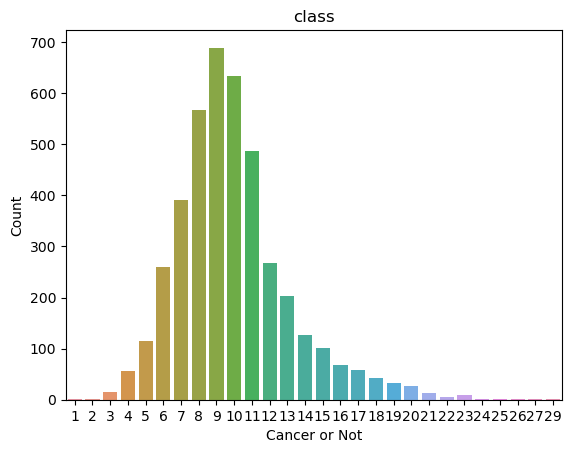

In [8]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("class")

In [9]:
# 결측치 확인
df.isnull().sum()

Sex        0
Length     0
Diam       0
Height     0
Whole      0
Shucked    0
Viscera    0
Shell      0
Rings      0
dtype: int64

In [10]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex        0
Length     0
Diam       0
Height     0
Whole      0
Shucked    0
Viscera    0
Shell      0
Rings      0
dtype: int64

In [25]:
# 레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['Length'] = label.fit_transform(df['Length'])
df['Diam'] = label.fit_transform(df['Diam'])
df['Height'] = label.fit_transform(df['Height'])
df['Whole'] = label.fit_transform(df['Whole'])
df['Shucked'] = label.fit_transform(df['Shucked'])
df['Viscera'] = label.fit_transform(df['Viscera'])
df['Shell'] = label.fit_transform(df['Shell'])
df['Rings'] = label.fit_transform(df['Rings'])




df.head()

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,2,45,36,17,285,178,94,113,6
1,0,81,67,26,962,480,280,374,8
2,2,63,56,24,718,400,225,273,9
3,1,41,34,15,253,159,76,87,6
4,1,60,43,18,463,254,152,207,7


In [26]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell
0,2,45,36,17,285,178,94,113
1,0,81,67,26,962,480,280,374
2,2,63,56,24,718,400,225,273
3,1,41,34,15,253,159,76,87
4,1,60,43,18,463,254,152,207


In [14]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    102
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [27]:
y.head()

0     7
1     9
2    10
3     7
4     8
Name: Rings, dtype: int64

In [28]:
Y = pd.get_dummies(y).values

In [29]:
X = X.values

In [30]:
X

array([[   2,   45,   36, ...,  178,   94,  113],
       [   0,   81,   67, ...,  480,  280,  374],
       [   2,   63,   56, ...,  400,  225,  273],
       ...,
       [   2,   95,   78, ...,  994,  571,  550],
       [   0,  100,   80, ..., 1005,  518,  530],
       [   2,  117,   94, ..., 1461,  732,  813]], dtype=int64)

In [31]:
y

0        7
1        9
2       10
3        7
4        8
        ..
4171    11
4172    10
4173     9
4174    10
4175    12
Name: Rings, Length: 4176, dtype: int64

In [32]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0) 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [35]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.2413793103448276
[[ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 51 19  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35 49 12  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22 67 46 10  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10 49 74 35  7  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 28 61 47 19  1  0  3  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  8 39 36 25  0  1  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  9 12 19 14  1  0  4  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 11 17  9  0  0  2  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4  6  7  0  1  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  6  4  0  2  1  0  4  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  4  6  1  1  1  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 

C:\Users\gksru\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 이전 코드 이후에 classification_report을 호출하여 사용
print(classification_report(y_test, pred_dt))

# Build a decision tree classifier and predict
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

NameError: name 'pred_dt' is not defined

In [37]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.2413793103448276
[[ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 51 19  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35 49 12  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22 67 46 10  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10 49 74 35  7  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 28 61 47 19  1  0  3  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  8 39 36 25  0  1  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  9 12 19 14  1  0  4  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 11 17  9  0  0  2  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4  6  7  0  1  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  6  4  0  2  1  0  4  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  4  6  1  1  1  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 

C:\Users\gksru\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.2049808429118774
[[ 1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4 11  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 18  6  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  5 53  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  2  5 69  7  4  7  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  1 83  2 26 24  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0 46  4 37 65  0  0  0 23  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  1 29  1 25 67  0  0  0 41  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0 13 66  0  0  0 27  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  9  0  7 28  1  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  2 14  0  0  0 27  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  1  0 10  0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1 11  0  0  0 12  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  4  0  0  0 12  0  0  0  0

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.2567049808429119
[[ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5 11 12  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7 23 29  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 25 27 32  7  1  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 11 29 49 36 13  5  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  9 43 56 39 21  2  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  7 22 52 43 27  5  1  2  1  1  0  0  0  1  0  0  0]
 [ 0  0  0  2  2  6 18 42 31  7  4  2  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  3  4 16 18  9  6  5  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  5  7  9 10  3  8  0  1  1  0  0  2  0  0  0  0]
 [ 0  0  0  0  2  2  4  4  4  0  2  2  1  2  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  2  9  2  4  1  2  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  4  2  0  1  4  2  2  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  3  2  1  0  1 

In [40]:
df = pd.read_csv("C:/ai/abalone/abalone.data", dtype={'ColumnName': str})
df.columns = ['Sex', 'Length', 'Diam', 'Height','Whole','Shucked', 'Viscera', 'Shell', 'Rings']


from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

df['Sex']=label.fit_transform(df['Sex'])
df['Length'] = label.fit_transform(df['Length'])
df['Diam'] = label.fit_transform(df['Diam'])
df['Height'] = label.fit_transform(df['Height'])
df['Whole'] = label.fit_transform(df['Whole'])
df['Shucked'] = label.fit_transform(df['Shucked'])
df['Viscera'] = label.fit_transform(df['Viscera'])
df['Shell'] = label.fit_transform(df['Shell'])
df['Rings'] = label.fit_transform(df['Rings'])

df

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,2,45,36,17,285,178,94,113,6
1,0,81,67,26,962,480,280,374,8
2,2,63,56,24,718,400,225,273,9
3,1,41,34,15,253,159,76,87,6
4,1,60,43,18,463,254,152,207,7
...,...,...,...,...,...,...,...,...,...
4171,0,88,73,32,1289,698,475,442,10
4172,2,93,71,26,1411,832,426,463,9
4173,2,95,78,40,1727,994,571,550,8
4174,0,100,80,29,1610,1005,518,530,9


In [42]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell
0,2,45,36,17,285,178,94,113
1,0,81,67,26,962,480,280,374
2,2,63,56,24,718,400,225,273
3,1,41,34,15,253,159,76,87
4,1,60,43,18,463,254,152,207


In [43]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell
1856,1,76,63,28,1003,630,282,369
2459,2,64,53,27,831,375,313,340
361,0,105,88,34,2023,1142,595,764
1513,0,106,91,42,2141,1270,588,763
3757,1,80,63,27,856,488,213,374
...,...,...,...,...,...,...,...,...
1033,0,106,75,31,2091,1262,654,326
3264,2,71,59,26,736,370,276,283
1653,1,94,75,29,1199,712,382,419
2607,0,100,81,34,1630,849,430,641


In [45]:
X_test.shape

(1044, 8)

In [46]:
X_train.shape[1]

8

In [47]:
y_train

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [48]:
y_train.shape

(3132, 28)

In [49]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Nadam

model = Sequential()

model.add(Dense(30,input_shape=(X_train.shape[1],),activation='relu'))
#input_shape: 입력 데이터의 모양을 지정한다. 첫 번째 레이어에서만 사용된다.
model.add(Dense(20,activation='relu'))
model.add(Dense(4, activation='softmax'))

#출력 유닛 수는 클래스 수(레이블 수)와 동일하게 설정한다!!!!!!

model.compile(Adam(learning_rate=0.02),'categorical_crossentropy', metrics=['accuracy'])
# 이진 분류일 때, model.compile(Adam(lr=0.04),'bce',metrics=['accuracy']) 를 써야한다.

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            84 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 974 (3.80 KB)

 Trainable params: 974 (3.80 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 28), output.shape=(None, 4)